# 🚢 Titanic Mini Data Analysis | Kübra Çağlayan Özkan

Bu çalışma, veri bilimine başlangıç seviyesinde bir ısınma projesidir.  
Aşağıdaki adımları içerir:

- Veri setinin yüklenmesi  
- Eksik verilerin incelenmesi ve temizlenmesi  
- Basit veri keşfi (EDA)  
- Görselleştirmeler  
- Logistic Regression ile temel bir sınıflandırma modeli  
- Accuracy hesaplama  

Bu proje, **AI & Data öğrenme yolculuğumun ilk mini projelerinden biridir.**


In [10]:
# ---------------------------------------------------------
# Titanic Veri Analizi
# Kübra Çağlayan Özkan - AI & Data öğrenme yolculuğum
# Amaç: Veriyi tanımak, biraz keşfetmek ve basit bir modelle başlamak
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Grafikler defter içinde düzgün görünsün
%matplotlib inline

# Veri setini GitHub'dan okuyalım
DATA_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Orijinal veriyi saklamak için:
titanic_df = pd.read_csv(DATA_URL)

# İlk 5 satıra göz atalım
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# ---------------------------------------------------------
# 2. Adım: Veri setinin genel yapısını anlamak
# ---------------------------------------------------------

# Sütun türleri, kaç tane boş değer var, toplam kaç satır vs.
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Sayısal sütunların istatistiksel özeti
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# ---------------------------------------------------------
# 3. Adım: Model ve görselleştirme için sade bir tablo hazırlama
# ---------------------------------------------------------

# Kullanacağımız temel sütunlar:
working_df = titanic_df[["Survived", "Pclass", "Sex", "Age", "Fare"]].copy()

# Cinsiyeti sayısala çevirelim: female=0, male=1
working_df["Sex"] = working_df["Sex"].map({"female": 0, "male": 1})

# Eksik yaş değerlerini kolondaki ortalama ile dolduralım (basit bir yöntem)
working_df["Age"] = working_df["Age"].fillna(working_df["Age"].mean())

# Kontrol: Hâlâ eksik değer var mı?
working_df.isna().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


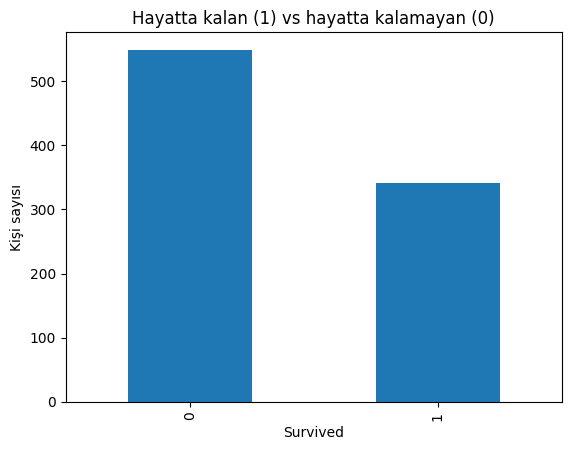

In [5]:
# ---------------------------------------------------------
# 4. Adım: Basit bir keşif görselleştirmesi
# ---------------------------------------------------------

working_df["Survived"].value_counts().plot(kind="bar")
plt.title("Hayatta kalan (1) vs hayatta kalamayan (0)")
plt.xlabel("Survived")
plt.ylabel("Kişi sayısı")
plt.show()


In [6]:
# Sınıfa göre hayatta kalma oranları
working_df.groupby("Pclass")["Survived"].mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
# ---------------------------------------------------------
# 5. Adım: Basit bir sınıflandırma modeli
# ---------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Özellikler ve hedef
X = working_df[["Pclass", "Sex", "Age", "Fare"]]
y = working_df["Survived"]

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modeli oluşturalım ve eğitelim
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin ve doğruluk
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.7988826815642458

##  Sonuç & Neler Öğrendim 💪

Bu mini projede Titanic veri setini kullanarak temel veri analizi, veri temizleme, görselleştirme ve Logistic Regression ile basit bir sınıflandırma modeli oluşturdum.

Bu çalışma sayesinde:
- Pandas ile veri okuma ve veri çerçevesi inceleme
- Eksik verilerin tespiti ve doldurulması
- Basit EDA (Exploratory Data Analysis)
- Matplotlib ile grafik oluşturma
- Train/Test ayırma
- Logistic Regression modeli kurma ve accuracy hesaplama

gibi veri biliminin temel adımlarını uygulamalı olarak öğrendim ve pekiştirdim.

Bu proje, AI & Data öğrenme yolculuğumda attığım ilk gerçek adımlardan biri oldu.
